Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - loss: 619.7524 - mae: 23.6496 - val_loss: 666.3680 - val_mae: 24.5729
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 590.3350 - mae: 23.0996 - val_loss: 638.6108 - val_mae: 23.9759
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 528.4952 - mae: 21.6230 - val_loss: 605.9547 - val_mae: 23.2575
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 493.8284 - mae: 20.6915 - val_loss: 565.9553 - val_mae: 22.3567
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 452.0819 - mae: 19.6282 - val_loss: 515.6600 - val_mae: 21.1903
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 435.1782 - mae: 18.9013 - val_loss: 451.5398 - val_mae: 19.6321
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 349.0462 - mae: 16.6938 - val_loss: 374.3622 - val_mae: 17.6135
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 319.1172 - mae: 15.8177 - val_loss: 287.9025 - val_mae: 15.2606
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━

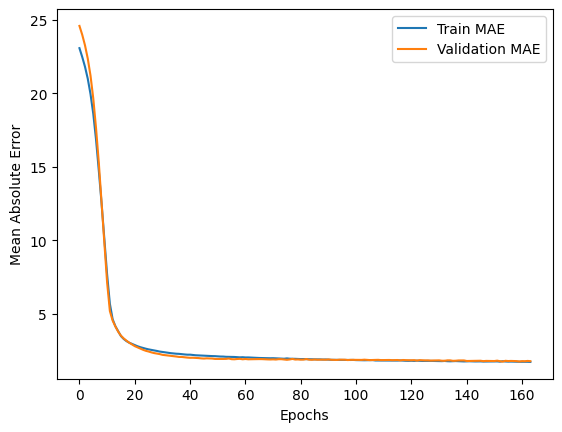

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.3097 - mae: 1.6760
Test MAE: 1.74
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


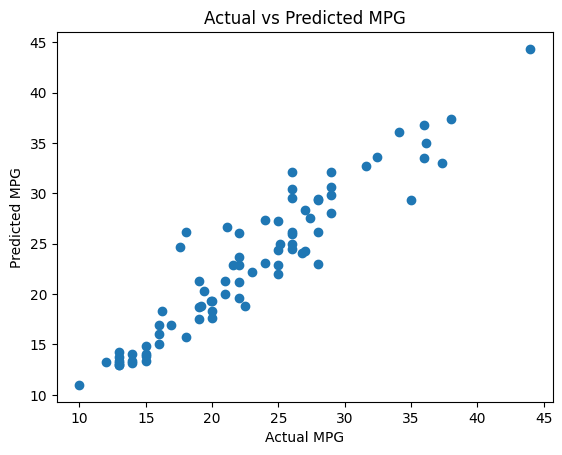

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/auto-mpg.csv')
head(df)

# Check for missing values
# Instead of dropping rows with missing values, replace '?' with NaN
df = df.replace('?', np.nan)
df = df.dropna()

# Convert categorical columns (if any)
df['origin'] = df['origin'].replace({1: 'USA', 2: 'Europe', 3: 'Japan'})
df = pd.get_dummies(df, columns=['origin'])

# Features and Target
y = df['mpg']
X = df.drop(['mpg', 'car name'], axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = build_model()

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train Model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stop], verbose=1)

# Plot Training History
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

# Evaluate on Test Set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test MAE: {test_mae:.2f}')

# Predictions
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.show()